In [15]:
import os
import sys

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt

import seaborn as sns

import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

%matplotlib inline

ImportError: /home/estrade/anaconda3/lib/python3.6/site-packages/torch/_C.cpython-36m-x86_64-linux-gnu.so: undefined symbol: nvrtcGetProgramLogSize

# Introduction

We will use Pytorch to do solve 101 Deep learning problems.

# MNIST

The "hello world" of Machine Learning.

In [4]:
from mydata.mnist import load_mnist

X, y = load_mnist()

Done.


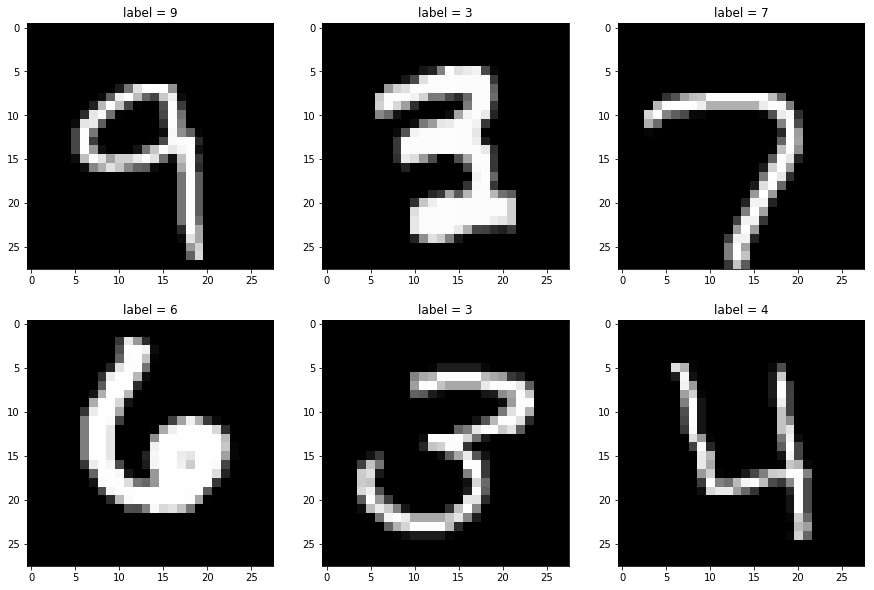

In [13]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

n_sample = X.shape[0]
for ax in np.ravel(axes):
    i = np.random.randint(0, n_sample)
    img = X[i].reshape(28,28)
    ax.imshow(img, cmap='gray')
    ax.set_title("label = {}".format(y[i]))

## Neural network achitecture

In [14]:
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.conv2_drop = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = F.relu(F.max_pool2d(self.conv1(x), 2))
        x = F.relu(F.max_pool2d(self.conv2_drop(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = F.relu(self.fc1(x))
        x = F.dropout(x, training=self.training)
        x = self.fc2(x)
return F.log_softmax(x, dim=1)

NameError: name 'nn' is not defined